In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

### Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в конкретном регионе от времени,

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

в) количество отказов компьютера,

г) число обращений в поликлинику по району,

д) координаты автобуса при движении по маршруту,

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

Если брать дословно, то только набор А, так как только там упоминается время. Но обычно все указанные данные хранятся с теми или иными временными метками, а значит все их можно интерпретировать, как временные ряды

### Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [2]:
DUQ_hourly_data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [3]:
DUQ_hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [4]:
DUQ_hourly_data.head(10)

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0
2005-12-31 06:00:00,1372.0
2005-12-31 07:00:00,1402.0
2005-12-31 08:00:00,1425.0
2005-12-31 09:00:00,1502.0


In [5]:
DUQ_hourly_data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


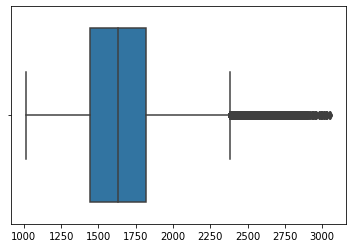

In [6]:
sns.boxplot(DUQ_hourly_data.values)

In [7]:
# проверим пропуски
DUQ_hourly_data['DUQ_MW'].isnull().sum()

0

Text(0, 0.5, 'МВт')

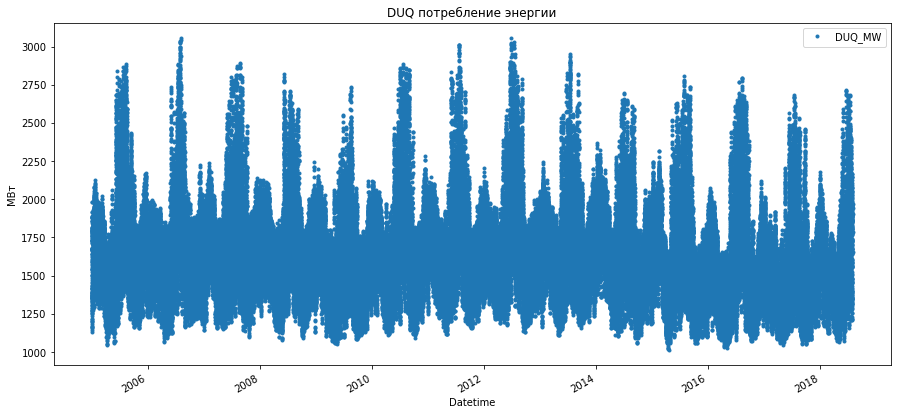

In [8]:
DUQ_hourly_data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ потребление энергии' )
plt.ylabel ( 'МВт' )

In [9]:
DUQ_hourly_data['date'] = DUQ_hourly_data.index

In [10]:
duq = DUQ_hourly_data['date'].unique()
print('число уникальных значений:   ',duq.shape[0],' : число наблюдений : ', DUQ_hourly_data.shape[0])

число уникальных значений:    119064  : число наблюдений :  119068


In [11]:
count_data = DUQ_hourly_data['date'].value_counts()
count_data.head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: date, dtype: int64

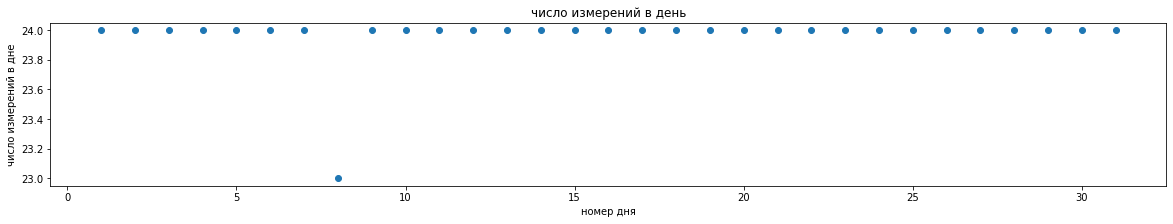

In [12]:
day_H=DUQ_hourly_data['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day

plt.figure(figsize=(20,3))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')

plt.xlabel('номер дня')
plt.ylabel('число измерений в дне')
plt.title('число измерений в день')
plt.show()

In [13]:
Day_count = day_H.value_counts() 
Day_count[Day_count != 24]

8    23
Name: Datetime, dtype: int64

In [14]:
DUQ_hourly_data['2015-03-08 01:00:00':'2015-03-08 06:00:00'].index

DatetimeIndex(['2015-03-08 01:00:00', '2015-03-08 02:00:00',
               '2015-03-08 04:00:00', '2015-03-08 05:00:00',
               '2015-03-08 06:00:00'],
              dtype='datetime64[ns]', name='Datetime', freq=None)

Text(0, 0.5, 'Потребление , МВт')

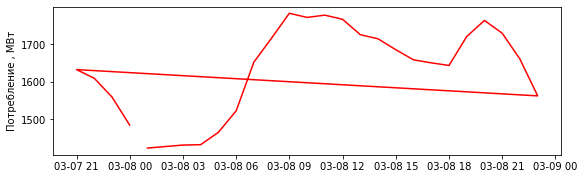

In [15]:
plt.figure(figsize=(20,6))
plt.subplot(2,2,1)
plt.plot(DUQ_hourly_data['2010-03-07 21:00:00':'2010-03-8 23:00:00'].index,DUQ_hourly_data['2010-03-07 21:00:00':'2010-03-08 23:00:00']['DUQ_MW'].values, 'r')
plt.ylabel('Потребление , МВт')

In [16]:
DUQ_hourly_data.iloc[19:26,:]

,DUQ_MW,date
Datetime,,
2005-12-31 20:00:00,1737.0,2005-12-31 20:00:00
2005-12-31 21:00:00,1726.0,2005-12-31 21:00:00
2005-12-31 22:00:00,1669.0,2005-12-31 22:00:00
2005-12-31 23:00:00,1592.0,2005-12-31 23:00:00
2006-01-01 00:00:00,1493.0,2006-01-01 00:00:00
2005-12-30 01:00:00,1484.0,2005-12-30 01:00:00
2005-12-30 02:00:00,1419.0,2005-12-30 02:00:00


In [17]:
DUQ_hourly_data = DUQ_hourly_data.sort_index()

In [18]:
DUQ_hourly_data.iloc[19:26,:]

,DUQ_MW,date
Datetime,,
2005-01-01 20:00:00,1546.0,2005-01-01 20:00:00
2005-01-01 21:00:00,1541.0,2005-01-01 21:00:00
2005-01-01 22:00:00,1534.0,2005-01-01 22:00:00
2005-01-01 23:00:00,1497.0,2005-01-01 23:00:00
2005-01-02 00:00:00,1389.0,2005-01-02 00:00:00
2005-01-02 01:00:00,1251.0,2005-01-02 01:00:00
2005-01-02 02:00:00,1204.0,2005-01-02 02:00:00


Text(0, 0.5, 'Потребление , МВт')

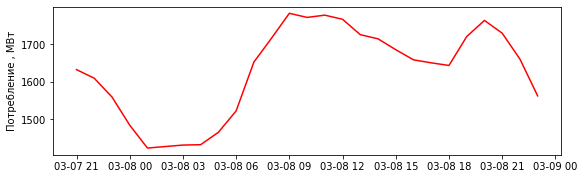

In [19]:
plt.figure(figsize=(20,6))
plt.subplot(2,2,1)
plt.plot(DUQ_hourly_data['2010-03-07 21:00:00':'2010-03-8 23:00:00'].index,DUQ_hourly_data['2010-03-07 21:00:00':'2010-03-08 23:00:00']['DUQ_MW'].values, 'r')
plt.ylabel('Потребление , МВт')

In [20]:
DUQ_hourly_data['year'] = DUQ_hourly_data['date'].dt.year
DUQ_hourly_data['month'] = DUQ_hourly_data['date'].dt.month
DUQ_hourly_data['dayofmonth'] = DUQ_hourly_data['date'].dt.day
DUQ_hourly_data['hour'] = DUQ_hourly_data['date'].dt.hour

In [21]:
DUQ_hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-01-01 01:00:00 to 2018-08-03 00:00:00
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   DUQ_MW      119068 non-null  float64       
 1   date        119068 non-null  datetime64[ns]
 2   year        119068 non-null  int64         
 3   month       119068 non-null  int64         
 4   dayofmonth  119068 non-null  int64         
 5   hour        119068 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 11.4 MB


In [22]:
for i in range(2005,2019):
    print(i, DUQ_hourly_data[f'{i}'].shape)

2005 (8757, 6)
2006 (8758, 6)
2007 (8758, 6)
2008 (8782, 6)
2009 (8758, 6)
2010 (8757, 6)
2011 (8758, 6)
2012 (8782, 6)
2013 (8758, 6)
2014 (8760, 6)
2015 (8760, 6)
2016 (8784, 6)
2017 (8760, 6)
2018 (5136, 6)


In [23]:
DUQ_hourly_data['2006'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8758 entries, 2006-01-01 00:00:00 to 2006-12-31 23:00:00
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DUQ_MW      8758 non-null   float64       
 1   date        8758 non-null   datetime64[ns]
 2   year        8758 non-null   int64         
 3   month       8758 non-null   int64         
 4   dayofmonth  8758 non-null   int64         
 5   hour        8758 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 479.0 KB


In [24]:
DUQ_hourly_data['2005'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8757 entries, 2005-01-01 01:00:00 to 2005-12-31 23:00:00
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DUQ_MW      8757 non-null   float64       
 1   date        8757 non-null   datetime64[ns]
 2   year        8757 non-null   int64         
 3   month       8757 non-null   int64         
 4   dayofmonth  8757 non-null   int64         
 5   hour        8757 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 478.9 KB


In [25]:
DUQ_hourly_data['2010'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8757 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DUQ_MW      8757 non-null   float64       
 1   date        8757 non-null   datetime64[ns]
 2   year        8757 non-null   int64         
 3   month       8757 non-null   int64         
 4   dayofmonth  8757 non-null   int64         
 5   hour        8757 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 478.9 KB


In [26]:
for i in range(1,13):
    print(i, DUQ_hourly_data[(DUQ_hourly_data['year']==2010) & (DUQ_hourly_data['month']==i)].shape)

1 (744, 6)
2 (672, 6)
3 (743, 6)
4 (720, 6)
5 (744, 6)
6 (720, 6)
7 (744, 6)
8 (744, 6)
9 (720, 6)
10 (744, 6)
11 (719, 6)
12 (743, 6)


In [27]:
for i in range(1,13):
    print(i, DUQ_hourly_data[(DUQ_hourly_data['year']==2006) & (DUQ_hourly_data['month']==i)].shape)

1 (744, 6)
2 (672, 6)
3 (744, 6)
4 (719, 6)
5 (744, 6)
6 (720, 6)
7 (744, 6)
8 (744, 6)
9 (720, 6)
10 (743, 6)
11 (720, 6)
12 (744, 6)


In [28]:
for i in range(1,31):
    print(i, DUQ_hourly_data[(DUQ_hourly_data['year']==2010) & (DUQ_hourly_data['month']==12) & (DUQ_hourly_data['dayofmonth']==i)].shape)

1 (24, 6)
2 (24, 6)
3 (24, 6)
4 (24, 6)
5 (24, 6)
6 (24, 6)
7 (24, 6)
8 (24, 6)
9 (24, 6)
10 (23, 6)
11 (24, 6)
12 (24, 6)
13 (24, 6)
14 (24, 6)
15 (24, 6)
16 (24, 6)
17 (24, 6)
18 (24, 6)
19 (24, 6)
20 (24, 6)
21 (24, 6)
22 (24, 6)
23 (24, 6)
24 (24, 6)
25 (24, 6)
26 (24, 6)
27 (24, 6)
28 (24, 6)
29 (24, 6)
30 (24, 6)


In [29]:
DUQ_hourly_data[(DUQ_hourly_data['year']==2010) & (DUQ_hourly_data['month']==12) & (DUQ_hourly_data['dayofmonth']==10)]

,DUQ_MW,date,year,month,dayofmonth,hour
Datetime,,,,,,
2010-12-10 01:00:00,1627.0,2010-12-10 01:00:00,2010,12,10,1
2010-12-10 02:00:00,1573.0,2010-12-10 02:00:00,2010,12,10,2
2010-12-10 03:00:00,1577.0,2010-12-10 03:00:00,2010,12,10,3
2010-12-10 04:00:00,1544.0,2010-12-10 04:00:00,2010,12,10,4
2010-12-10 05:00:00,1591.0,2010-12-10 05:00:00,2010,12,10,5
2010-12-10 06:00:00,1654.0,2010-12-10 06:00:00,2010,12,10,6
2010-12-10 07:00:00,1812.0,2010-12-10 07:00:00,2010,12,10,7
2010-12-10 08:00:00,1927.0,2010-12-10 08:00:00,2010,12,10,8
2010-12-10 09:00:00,1936.0,2010-12-10 09:00:00,2010,12,10,9


In [30]:
DUQ_hourly_data['2018'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5136 entries, 2018-01-01 00:00:00 to 2018-08-03 00:00:00
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DUQ_MW      5136 non-null   float64       
 1   date        5136 non-null   datetime64[ns]
 2   year        5136 non-null   int64         
 3   month       5136 non-null   int64         
 4   dayofmonth  5136 non-null   int64         
 5   hour        5136 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 280.9 KB


In [31]:
for i in range(1,9):
    print(i, DUQ_hourly_data[(DUQ_hourly_data['year']==2018) & (DUQ_hourly_data['month']==i)].shape)

1 (744, 6)
2 (672, 6)
3 (743, 6)
4 (720, 6)
5 (744, 6)
6 (720, 6)
7 (744, 6)
8 (49, 6)


Ряд расположен в промежутке от 2005-01-01 01:00:00 до 2018-08-03 00:00:00. Шаг измерений по 1 час. Число записей 119068. Есть дубли и пропуски значений. За исключением пропуска 2010-12-10, когда пропало измерение в 00:00, все остальные дубли и пропуски можно объяснить переводом времени. Но в 2014-2017 году они предпочитали дублировать значения, а в остальные года просто пропускать измерение в 3 час. Также по неизвестной причине в какие-то года был перевод в 3 и 11 месяц, а какие-то 4 и 10. Данные имеют циклы, относительно ровные, без явных провалов. Порядок хранения данных не упорядоченный.

### Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [32]:
brent_data = pd.read_excel('нефть-brent_2010-2019.xlsx', index_col=[0], parse_dates=[0])

In [33]:
brent_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2019-09-01 to 2010-09-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Значение  2667 non-null   float64
dtypes: float64(1)
memory usage: 41.7 KB


In [34]:
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [35]:
# проверим пропуски
brent_data['Значение'].isnull().sum()

0

In [36]:
brent_data = brent_data.sort_index()

Text(0.5, 0, 'date')

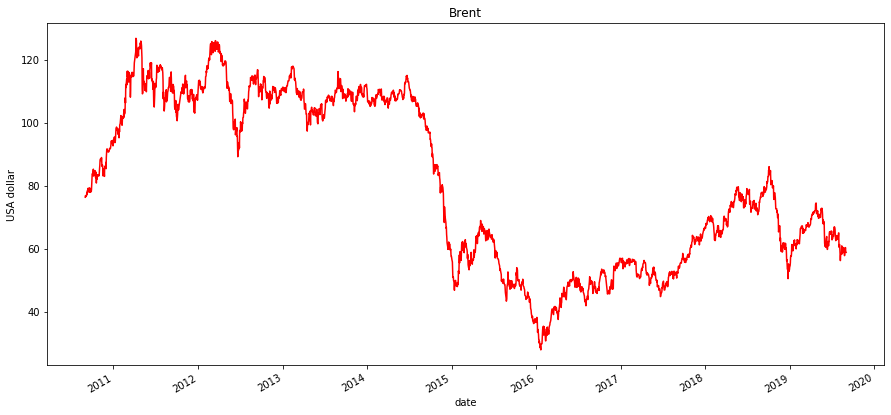

In [37]:
_ = brent_data['Значение'].plot( style='r', figsize=( 15, 7 ), title='Brent')
plt.ylabel('USA dollar')
plt.xlabel('date')

In [38]:
brent_data['date'] = brent_data.index

In [39]:
brent_data['year'] = brent_data['date'].dt.year
brent_data['month'] = brent_data['date'].dt.month
brent_data['dayofmonth'] = brent_data['date'].dt.day

In [40]:
count_data = brent_data['date'].value_counts()
count_data.head()

2016-11-14    1
2013-02-01    1
2012-10-23    1
2015-01-26    1
2018-05-02    1
Name: date, dtype: int64

In [41]:
brent_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2010-09-01 to 2019-09-01
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Значение    2667 non-null   float64       
 1   date        2667 non-null   datetime64[ns]
 2   year        2667 non-null   int64         
 3   month       2667 non-null   int64         
 4   dayofmonth  2667 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 125.0 KB


In [42]:
for i in range(2010,2020):
    print(i, brent_data[f'{i}'].shape)

2010 (105, 5)
2011 (295, 5)
2012 (310, 5)
2013 (298, 5)
2014 (304, 5)
2015 (272, 5)
2016 (259, 5)
2017 (307, 5)
2018 (310, 5)
2019 (207, 5)


In [43]:
for i in range(1,13):
    print(i, brent_data[(brent_data['year']==2011) & (brent_data['month']==i)].shape)

1 (25, 5)
2 (24, 5)
3 (26, 5)
4 (23, 5)
5 (26, 5)
6 (26, 5)
7 (26, 5)
8 (27, 5)
9 (26, 5)
10 (17, 5)
11 (26, 5)
12 (23, 5)


In [44]:
brent_data[(brent_data['year']==2011) & (brent_data['month']==10)]

,Значение,date,year,month,dayofmonth
Дата,,,,,
2011-10-02,101.40,2011-10-02,2011,10,2
2011-10-03,100.69,2011-10-03,2011,10,3
2011-10-04,101.96,2011-10-04,2011,10,4
2011-10-05,102.77,2011-10-05,2011,10,5
2011-10-06,105.40,2011-10-06,2011,10,6
2011-10-07,105.91,2011-10-07,2011,10,7
2011-10-09,104.13,2011-10-09,2011,10,9
2011-10-20,109.93,2011-10-20,2011,10,20
2011-10-21,109.79,2011-10-21,2011,10,21


Ряд в промежутке 2010-09-01 и 2019-09-01. Шаг измерений день. Дублей нет, пропуски есть. Явные пропуски в 11, 13, 15, 16 годах. Плавающее число измерений в других годах может быть объяснено какими-то праздниками и выходными днями, которые были характерны именно для этого года. Объяснить же например как-то провал измерений в 2011-10 с 10 по 19 день мне не удалось.

In [45]:
brent_data_week = brent_data.resample("W").mean()
brent_data_week.head()

,Значение,year,month,dayofmonth
Дата,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000
2010-09-12,77.673333,2010.0,9.000000,8.500000
2010-09-19,78.693333,2010.0,9.000000,15.666667
2010-09-26,78.518333,2010.0,9.000000,22.666667
2010-10-03,81.211667,2010.0,9.333333,19.666667


In [46]:
brent_data_month = brent_data.resample("M").mean()
brent_data_month.head()

,Значение,year,month,dayofmonth
Дата,,,,
2010-09-30,78.228148,2010.0,9.0,15.185185
2010-10-31,83.473462,2010.0,10.0,16.000000
2010-11-30,86.178077,2010.0,11.0,15.346154
2010-12-31,92.232308,2010.0,12.0,16.384615
2011-01-31,97.033200,2011.0,1.0,16.680000


In [47]:
brent_data_year = brent_data.resample("Y").mean()
brent_data_year.head()

,Значение,year,month,dayofmonth
Дата,,,,
2010-12-31,84.963238,2010.0,10.485714,15.723810
2011-12-31,110.758746,2011.0,6.416949,15.749153
2012-12-31,111.377484,2012.0,6.529032,15.838710
2013-12-31,108.137114,2013.0,6.647651,15.694631
2014-12-31,99.435493,2014.0,6.542763,15.786184


### Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

Text(0.5, 0, 'date')

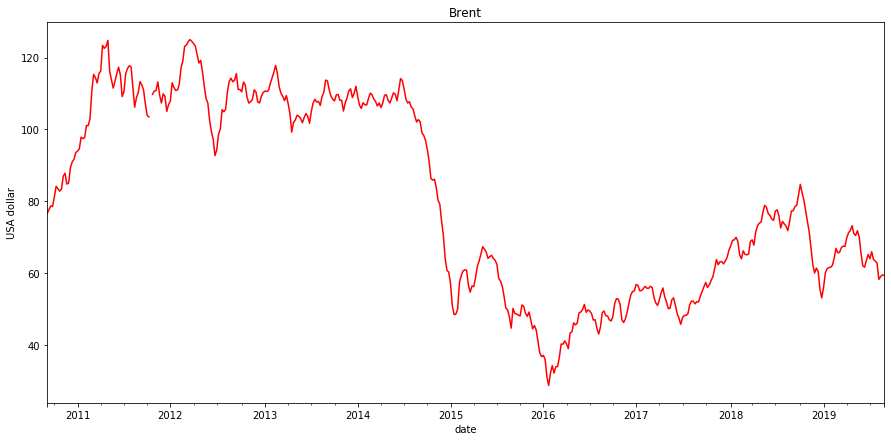

In [48]:
_ = brent_data.resample("W").mean()['Значение'].plot( style='r', figsize=( 15, 7 ), title='Brent')
plt.ylabel('USA dollar')
plt.xlabel('date')

Text(0.5, 0, 'date')

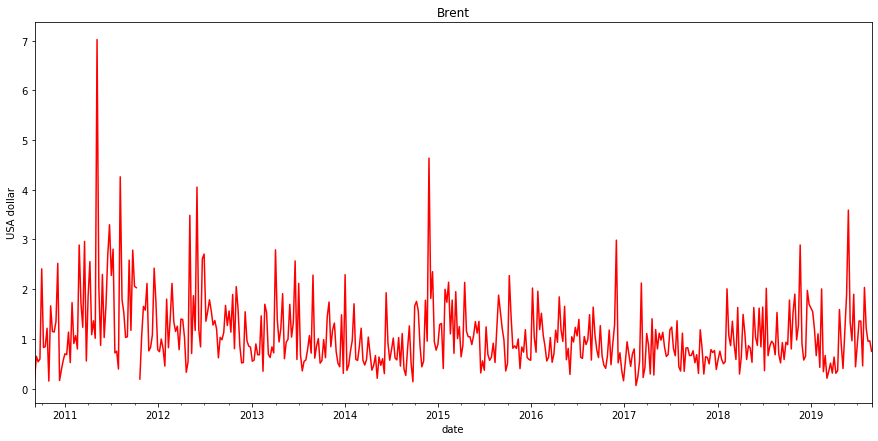

In [49]:
_ = brent_data.resample("W").std()['Значение'].plot( style='r', figsize=( 15, 7 ), title='Brent')
plt.ylabel('USA dollar')
plt.xlabel('date')

Text(0.5, 0, 'date')

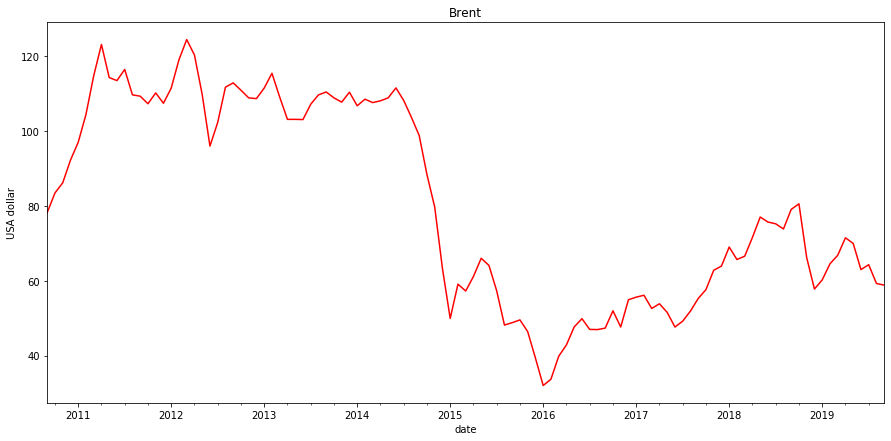

In [50]:
_ = brent_data_month.resample("M").mean()['Значение'].plot( style='r', figsize=( 15, 7 ), title='Brent')
plt.ylabel('USA dollar')
plt.xlabel('date')

Text(0.5, 0, 'date')

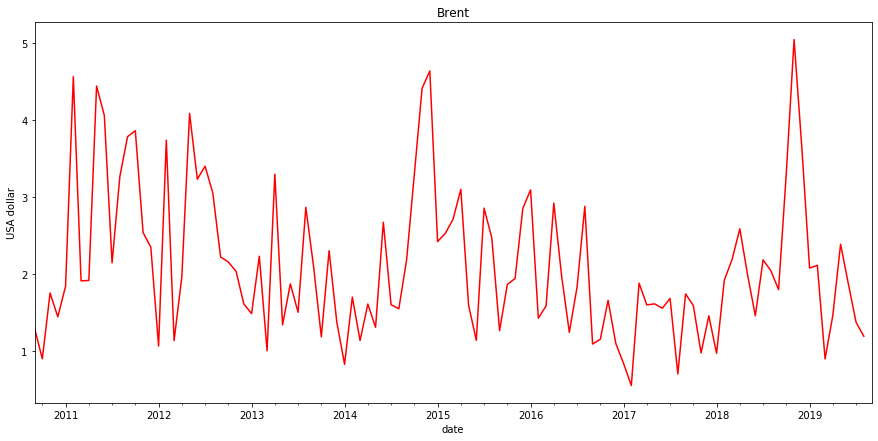

In [51]:
_ = brent_data.resample("M").std()['Значение'].plot( style='r', figsize=( 15, 7 ), title='Brent')
plt.ylabel('USA dollar')
plt.xlabel('date')

Text(0.5, 0, 'date')

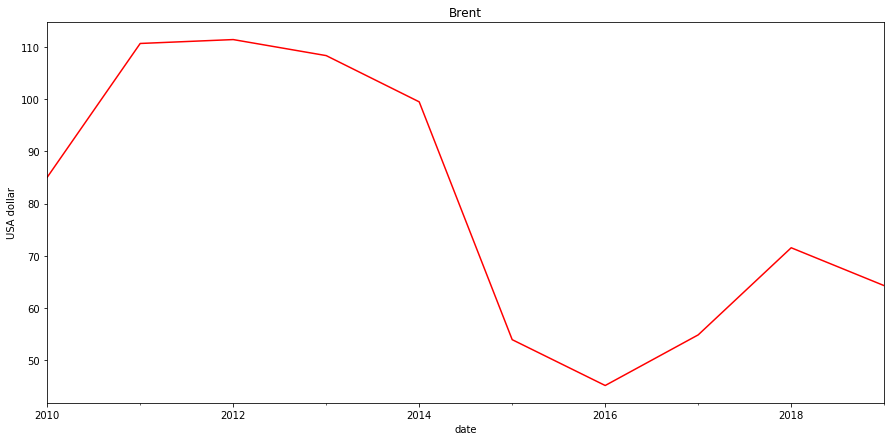

In [52]:
_ = brent_data_month.resample("Y").mean()['Значение'].plot( style='r', figsize=( 15, 7 ), title='Brent')
plt.ylabel('USA dollar')
plt.xlabel('date')

Text(0.5, 0, 'date')

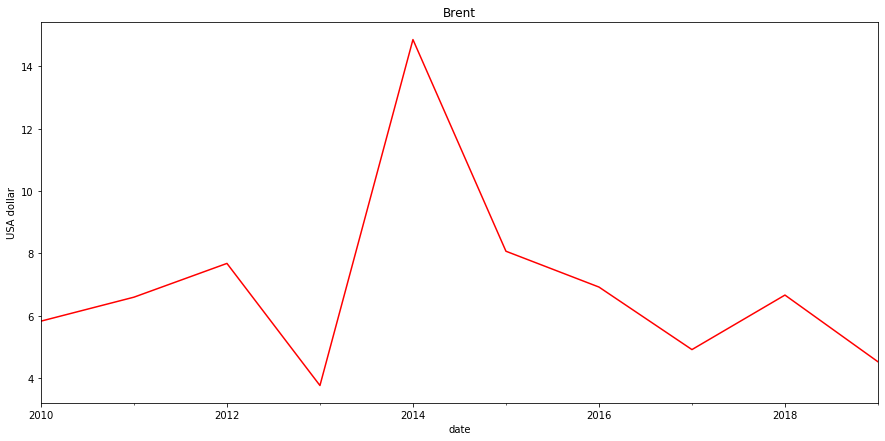

In [53]:
_ = brent_data_month.resample("Y").std()['Значение'].plot( style='r', figsize=( 15, 7 ), title='Brent')
plt.ylabel('USA dollar')
plt.xlabel('date')

### Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовым.

Годовой график среднего сильно сглаживает достаточно сильные изменения цены относительно недельного и месячного графика. График же среднеквадратичного у года противоположен месячному и недельному. Там где на коротких промежутках точки максимума, на годовом минимума